In [1]:
import ffn
%matplotlib inline
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import pickle
import talib
from talib import MA_Type
import requests

In [2]:
# 讀出預先下載好的股價資料
with open('stockdata', 'rb') as f:
    data = pickle.load(file=f)

# Q1. 畫出 Diamond Shape

In [3]:
def diamond(n):
    for i in range(1,n+1):
        print(' '*(n-i) + '*'*(2*i-1))
        
    for y in range(n-1,-1,-1):
        print(' '*(n-y) + '*'*(2*y-1))



In [4]:
diamond(5)

    *
   ***
  *****
 *******
*********
 *******
  *****
   ***
    *
     


# Q2. 刪除重複性資料

從 symbols01.txt 跟 symbols02.txt 讀入兩組股票代號，合併兩組代號，輸出一份無重複的股票代號到 symbols03.txt。

In [5]:
#打開並讀文字檔,轉成set
with open('symbols01.txt','r') as f:
    symbols_01=f.read()
    symbols_01=symbols_01.strip().split("\n")
    set01=set(symbols_01)
    
with open('symbols02.txt','r') as f:
    symbols_02=f.read()
    symbols_02=symbols_02.strip().split("\n")
    set02=set(symbols_02)

In [6]:
#取set01.set02的聯集;set會自動扣兩個檔案重複的地方
set03 = (set01 | set02)

#轉成 list
symbols03 = list(set03)

In [7]:
#將 symbols03輸出文字檔，並注意大寫與換行
with open('symbols03.txt','w') as f:
    for symbol in symbols03:
        f.write(symbol.strip().upper()+"\n")
        f.close

# Q3. 下載台灣上市公司基本資料

寫一個程式從 http://dts.twse.com.tw/opendata/t187ap03_L.csv 下載台灣上市公司基本資料，並輸出成 pandas dataframe。

In [8]:
import requests
import pandas as pd

import io 

In [9]:
r = requests.get("http://dts.twse.com.tw/opendata/t187ap03_L.csv")
r.encoding="big5"
com_data = r.text.split("\r\n")

In [10]:
com_data = io.StringIO(r.text)
com_data = pd.read_csv(com_data, skiprows=1,index_col=False)
com_data.head()

,公司代號,公司名稱,產業別,住址,營利事業統一編號,董事長,總經理,發言人,發言人職稱,代理發言人,...,特別股,編制財務報表類型,股票過戶機構,過戶電話,過戶地址,英文簡稱,英文通訊地址,傳真機號碼,電子郵件信箱,網址
0,1101,台灣水泥股份有限公司,水泥工業,台北市中山北路2段113號,11913502.0,張安平,李鐘培,黃健強,資深副總經理,蔡立文,...,0.0,1.0,中國信託商業銀行代理部,66365566,台北市重慶南路一段83號5樓,TCC,"No.113, Sec.2, Zhongshan N. Rd.,Taipei City 10...",(02)2531-6529,finance@taiwancement.com,http://www.taiwancement.com
1,1102,亞洲水泥股份有限公司,水泥工業,台北市大安區敦化南路2段207號30、31樓,3244509.0,徐旭東,李坤炎,周維崑,副總經理,吳玲綾,...,0.0,1.0,亞東證券股份有限公司,02-2361-8608,台北市重慶南路一段86號3樓,ACC,"30TH FLOOR,TAIPEI METRO TOWER,207.TUN HWA SOUT...",02-2378-5191,service@acc.com.tw,www.acc.com.tw
2,1103,嘉新水泥股份有限公司,水泥工業,台北市中山北路2段96號,11892801.0,張剛綸,祁士鉅,王立心,執行副總經理,余曉芸,...,0.0,1.0,群益金鼎證券股份有限公司股代部,(02)2702-3999,台北市敦化南路2段97號地下2樓,CHC,"No.96, Sec. 2, Zhongshan N. Rd., Zhongshan Dis...",(02)2511-4002,investor-relations@chcgroup.com.tw,www.chcgroup.com.tw
3,1104,環球水泥股份有限公司,水泥工業,台北市南京東路二段125號10樓,7568009.0,侯博義,侯博義,楊宗仁,經理,詹志鴻,...,0.0,1.0,凱基證券股份有限公司股務代理部,02-23892999,﹝100﹞台北市重慶南路一段2號5樓,UCC,"10th F1., 125 Nanking E.Rd Sec. 2,Taipei Taiwan",02-25075870,ucc@ucctw.com,www.ucctw.com
4,1108,幸福水泥股份有限公司,水泥工業,台北市松江路237號15樓,40601248.0,陳兩傳,陳兩傳,溫秀菊,財務部經理,陳一誠,...,0.0,1.0,永豐金證券股務代理,2381-6288,台北市中正區博愛路17號3樓,LUCKY CEMENT,"15TH FL.,NO.237,SUNG KIANG RD.,TAIPEI,TAIWAN,R...",25048672,"wendy@luckygrp,com.tw",www.luckygrp.com.tw


# Q4. 畫出技術曲線

請畫出除了上課提過的線型之外的任何技術曲線，並寫註解說明。

In [ ]:
##老師的範例:均線
#選data裡的一家公司股價資料畫圖
df = data['GOOG']
# 計算均線
df['20d'] = pd.Series.rolling(df['Close'], window=20).mean()
df['60d'] = pd.Series.rolling(df['Close'], window=60).mean()
#畫圖
df[['Close', '20d', '60d']].plot(legend='best', figsize=(10,8))

In [12]:
data.keys()
df1 = data['GOOG']  #選擇GOOG作為使用的股票
df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,769.500000,769.500000,758.340027,758.880005,758.880005,1500900
2016-01-04,743.000000,744.059998,731.257996,741.840027,741.840027,3272800
2016-01-05,746.450012,752.000000,738.640015,742.580017,742.580017,1950700
2016-01-06,730.000000,747.179993,728.919983,743.619995,743.619995,1947000
2016-01-07,730.309998,738.500000,719.059998,726.390015,726.390015,2963700


In [14]:
#bbands策略,N=20
df1['20ma'] = pd.Series.rolling(df1['Close'], window=20).mean()
df1['SD'] = pd.Series.rolling(df1['Close'], window=20).std()

In [15]:
# 上軌=20ma+1.5sd ,中軌=20ma, 下軌=20ma-1.5sd
df1['upbbands'] = df1['20ma']+1.5*df1['SD']
df1['midbbands']=df1['20ma']
df1['lowbbands'] = df1['20ma']-1.5*df1['SD']

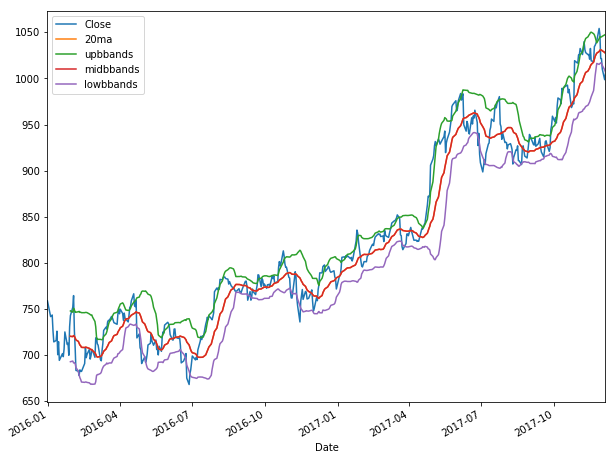

In [21]:
#畫圖啦!figsize(X軸長度,Y軸高度)
df1[['Close','20ma','upbbands','midbbands','lowbbands']].plot(legend='best', figsize=(10,8))

# Q5. 策略回測

In [22]:
# 計算 MaxDD
def DrawDownAnalysis(cumRet):
    dd_series = ffn.core.to_drawdown_series(cumRet)
    dd_details = ffn.core.drawdown_details(dd_series)
    return dd_details['drawdown'].min(), dd_details['days'].max()

In [23]:
# 利用策略產生的持有部位資訊，計算底下四個指標來判斷投資績效
# sharpe ratio: 判斷報酬的好壞跟穩定度，數值越大越好
# maxdd: maximum drawdown, 最糟糕的狀況會賠幾 %
# maxddd: maximum drawdown duration, 低於上一次最高報酬的天數
# cumRet[-1]: 最後賺的 % 數

def indicators(df):
    dailyRet = df['Close'].pct_change()
    excessRet = (dailyRet - 0.04/252)[df['positions'] == 1]
    SharpeRatio = np.sqrt(252.0)*np.mean(excessRet)/np.std(excessRet)
    
    cumRet = np.cumprod(1+excessRet)
    
    maxdd, maxddd = DrawDownAnalysis(cumRet)
    
    return SharpeRatio, maxdd, maxddd, cumRet[-1]

In [27]:
# 這是我們的策略的部分
# 主要只是要算出進出的訊號 signals 跟何時持有部位 positions
# 底下是一個突破系統的範例

def Breakout_strategy(df):
    # Donchian Channel
    df['20d_high'] = np.round(pd.Series.rolling(df['Close'], window=20).max(), 2)
    df['10d_low'] = np.round(pd.Series.rolling(df['Close'], window=10).min(), 2)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] > df['20d_high'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] < df['10d_low'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [28]:
def RSI_7030_strategy(df):
    df['RSI'] = talib.RSI(df['Close'].values)
    
    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['RSI'][t-1] < 30:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['RSI'][t-1] > 70:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [29]:
def BBands_strategy(df):
    df['UBB'], df['MBB'], df['LBB'] = talib.BBANDS(df['Close'].values, matype=MA_Type.T3)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] < df['LBB'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] > df['UBB'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

### 我的策略

In [69]:
# 策略 : BBand + 5MA
# 若5MA開始向上突破下軌，低檔買進
# 若收盤價向下跌破中軌，獲利了結賣出

def M064810012_strategy(df):
    
    df['5ma'] = pd.Series.rolling(df['Close'], window=5).mean()
    # bbands策略,N=20
    df['20ma'] = pd.Series.rolling(df['Close'], window=20).mean()
    df['SD'] = pd.Series.rolling(df['Close'], window=20).std()
    # 上軌=20ma+1.5sd ,中軌=20ma, 下軌=20ma-1.5sd
    df['upbbands'] = df['20ma']+1.5*df['SD']
    df['midbbands']=df['20ma']
    df['lowbbands'] = df['20ma']-1.5*df['SD']
    
    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if  (df['5ma'][t] > df['lowbbands'][t-1]):
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif  (df['Close'][t] < df['midbbands'][t-1]):
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False
    

    df['positions'] = df['signals'].cumsum().shift()
    return df


In [70]:
def apply_strategy(strategy, df):
    return strategy(df)

In [71]:
# 計算各支股票的回測結果
results = []

#strategies = [Breakout_strategy, RSI_7030_strategy, BBands_strategy, 學號_strategy]
strategies = [Breakout_strategy, RSI_7030_strategy,M064810012_strategy]

for symbol in data:
    for strategy in strategies:
        try:
            apply_strategy(strategy, data[symbol])
            if np.all(data[symbol]['signals']==0):
                print("Symbol:", symbol, "使用", strategy.__name__, "策略沒有出現買賣訊號。")
                continue
            SharpeRatio, maxdd, maxddd, finalRet = indicators(data[symbol])
            days = (data[symbol].index[-1] - data[symbol].index[0]).days
            results.append((SharpeRatio, maxdd, maxddd, finalRet, days,
                            data[symbol][data[symbol]['signals'] > 0]['signals'].sum(), symbol, strategy.__name__))
        except Exception as e:
            print("Error occurs at symbol:", symbol, "Strategy:", strategy.__name__, "==>", e.args)

In [72]:
results_df = pd.DataFrame(results, columns=['sharpe','MaxDrawDown','MaxDrawDownDuration','returns', 
                                            'days', 'entries','symbol','strategy'])

In [73]:
results_df.head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
0,0.131503,-0.208296,281,0.995734,705,11,TICC,Breakout_strategy
1,0.395515,-0.244817,482,1.077756,705,2,TICC,RSI_7030_strategy
2,0.567726,-0.228401,281,1.219427,705,6,TICC,M064810012_strategy
3,1.365570,-0.361485,299,1.631388,705,12,TWIN,Breakout_strategy
4,2.424484,-0.169115,115,2.151881,705,3,TWIN,RSI_7030_strategy


In [74]:
results_df.sort_values('MaxDrawDown',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
55,6.306176,-0.003654,122,1.028222,473,3,LCA,RSI_7030_strategy
13,10.243474,-0.006251,3,1.132402,705,1,GOOG,RSI_7030_strategy
27,3.040178,-0.023844,58,1.073352,203,3,CSML,Breakout_strategy
49,-1.279635,-0.029044,62,0.982055,384,1,SCAC,RSI_7030_strategy
28,4.202639,-0.031822,16,1.068818,203,1,CSML,RSI_7030_strategy


In [75]:
results_df.sort_values('returns',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
20,2.256308,-0.157591,88,3.344804,705,5,RICK,M064810012_strategy
59,1.327598,-0.490899,223,3.114115,705,5,BBGI,M064810012_strategy
7,2.013777,-0.219296,167,2.477803,705,4,AMOT,RSI_7030_strategy
11,1.101423,-0.329207,210,2.204683,705,8,CDZI,M064810012_strategy
4,2.424484,-0.169115,115,2.151881,705,3,TWIN,RSI_7030_strategy
